In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [4]:
col = ['Crop_Year','Area','Production','Annual_Rainfall','Fertilizer','Pesticide','Crop','Season','State','Yield']
df = df[col]

In [5]:
#Train_test_starts_here

In [6]:
X = df.drop('Yield',axis=1)
y = df['Yield']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [9]:
X_train.head(1)

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Crop,Season,State
19466,2011,357.0,1022,3340.395455,59804.64,117.81,Groundnut,Kharif,Goa


In [17]:
X_train.shape

(15751, 9)

In [19]:
X_test.shape

(3938, 9)

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [11]:
ohe = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')
scaler = StandardScaler()

In [12]:
preprocessor = ColumnTransformer(
transformers=[
    ('onehotencoder',ohe,[6,7,8]),
    ('Standardization',scaler,[0,1,2,3,4,5])
],
remainder = 'passthrough'
)

In [13]:
preprocessor.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [6, 7, 8]),
                                ('Standardization', StandardScaler(),
                                 [0, 1, 2, 3, 4, 5])])

In [14]:
X_train_dummy = preprocessor.transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [15]:
#Model_training_starts_here

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf = RandomForestRegressor()

In [18]:
rf.fit(X_train_dummy,y_train)

RandomForestRegressor()

In [19]:
y_pred = rf.predict(X_test_dummy)

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [21]:
print("MAE:", mean_absolute_error(y_test, y_pred), "Score:", r2_score(y_test, y_pred))

MAE: 7.268217242604954 Score: 0.9870932632231936


In [22]:
rfr = RandomForestRegressor()
rfr.fit(X_train_dummy, y_train)
rfr.predict(X_test_dummy)

array([3.72891221, 1.4146796 , 6.595434  , ..., 1.42266647, 0.67222181,
       0.3830193 ])

In [25]:
def prediction(input_data):
    transformed_features = preprocessor.transform(input_data)
    predicted_value = rfr.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]

In [26]:
input_data = pd.DataFrame({
    'Crop_Year': [2011],
    'Area': [357.0],
    'Production': [1022],
    'Annual_Rainfall': [3340.395455],
    'Fertilizer': [59804.64],
    'Pesticide': [117.81],
    'Crop': ['Groundnut'],
    'Season': ['Kharif'],
    'State': ['Goa']
})

result = prediction(input_data)

C:\Users\sreel\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [27]:
import pickle
pickle.dump(rfr,open('rfr.pkl','wb'))
#pickle.dump(preprocessor,open('preprocessor.pkl','wb'))

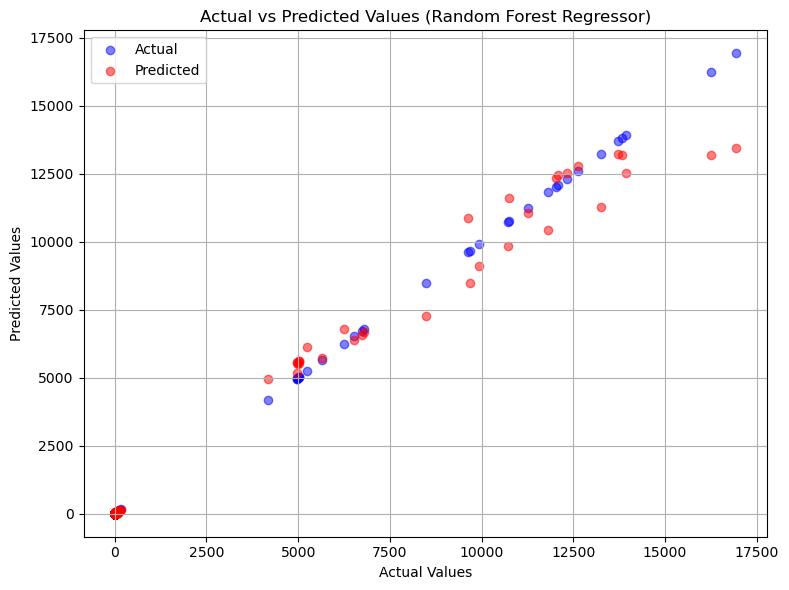

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)  # Plot actual values in blue
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)  # Plot predicted values in red
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.legend()  # Add legend to differentiate between actual and predicted values
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout for better fit